In [18]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.rcParams['figure.figsize']= (12,9)
plt.style.use('ggplot')

In [12]:
url = 'https://raw.githubusercontent.com/BenjiDSci/jupyter/master/RFM_AGO.csv'
df = read_csv(url)
df = df[df['MonetaryVariable']<=4000]
df.head()

,ClientNo,Property,Age,Sex,City,TenureInDays,LastVisit,DaysSinceLastVisit,MedianDaysBetweenGamingDays,STDEVPDaysBetweenGamingDays,...,TotalTheoWin,TotalDaysBetweenGamingDays,AVGDailyTheoWin,AveragePlayedAmount,DormancyVariable,FrequencyVariable,MonetaryVariable,DormancyBand,FrequencyBand,MonetaryBand
0,1001090,NEWYORK,80.503995,Mujer,MONTERREY,242,31/08/2019 00:00,0,1.0,0.857411,...,23086.37263,241,128.257626,2039.819444,0,740,3.886595,0,600,0
1,1001091,SANMARCOS,59.350571,Mujer,CADEREYTA JIMENEZ,242,30/08/2019 00:00,1,1.0,3.398915,...,71540.84126,220,861.937846,12677.346990,419,341,66.302911,300,150,50
2,1001093,DUBAI,49.846461,Hombre,BENITO JUAREZ,243,31/08/2019 00:00,0,1.0,1.389929,...,18418.58017,242,147.348641,2302.224080,0,512,5.080988,0,350,0
3,1001095,JUBILEE,71.923174,Mujer,MONTERREY,241,29/08/2019 00:00,2,1.0,2.669968,...,21585.36488,238,176.929220,2939.083525,683,504,5.897641,500,350,0
4,1002090,PARADISE,38.994406,Hombre,MONTERREY,163,11/08/2019 00:00,20,4.0,57.364514,...,583.78255,143,145.945638,1676.800000,586,24,4.422595,500,0,0


In [13]:
x = df.loc[:, ['DormancyVariable', 'FrequencyVariable', 'MonetaryVariable']].values
kmeans = KMeans(n_clusters=10).fit(x)
centroides = kmeans.cluster_centers_
print(centroides)

[[ 491.35650075   54.6516564    21.20640272]
 [  15.0354423   305.13268893   28.92998246]
 [ 831.47152998  183.31324573   29.67058575]
 [ 825.09422188   48.71934028   20.54458718]
 [  44.12639056   67.91180807   21.11647276]
 [   2.43623025  653.34988713   29.68268509]
 [ 593.04658041  447.75489834   32.98242761]
 [ 288.04756178   60.74316641   20.98477481]
 [ 547.45890411  119.10273973 1058.98328475]
 [ 669.06951837   52.70738673   21.60294035]]


In [14]:
clusters = kmeans.predict(x)

color = ['red', 'green', 'blue', 'yellow', 'gray', 'orange', 'cyan', 'purple', 'black', 'brown']
asignar = []
for i in clusters:
    asignar.append(color[i])

<IPython.core.display.Javascript object>


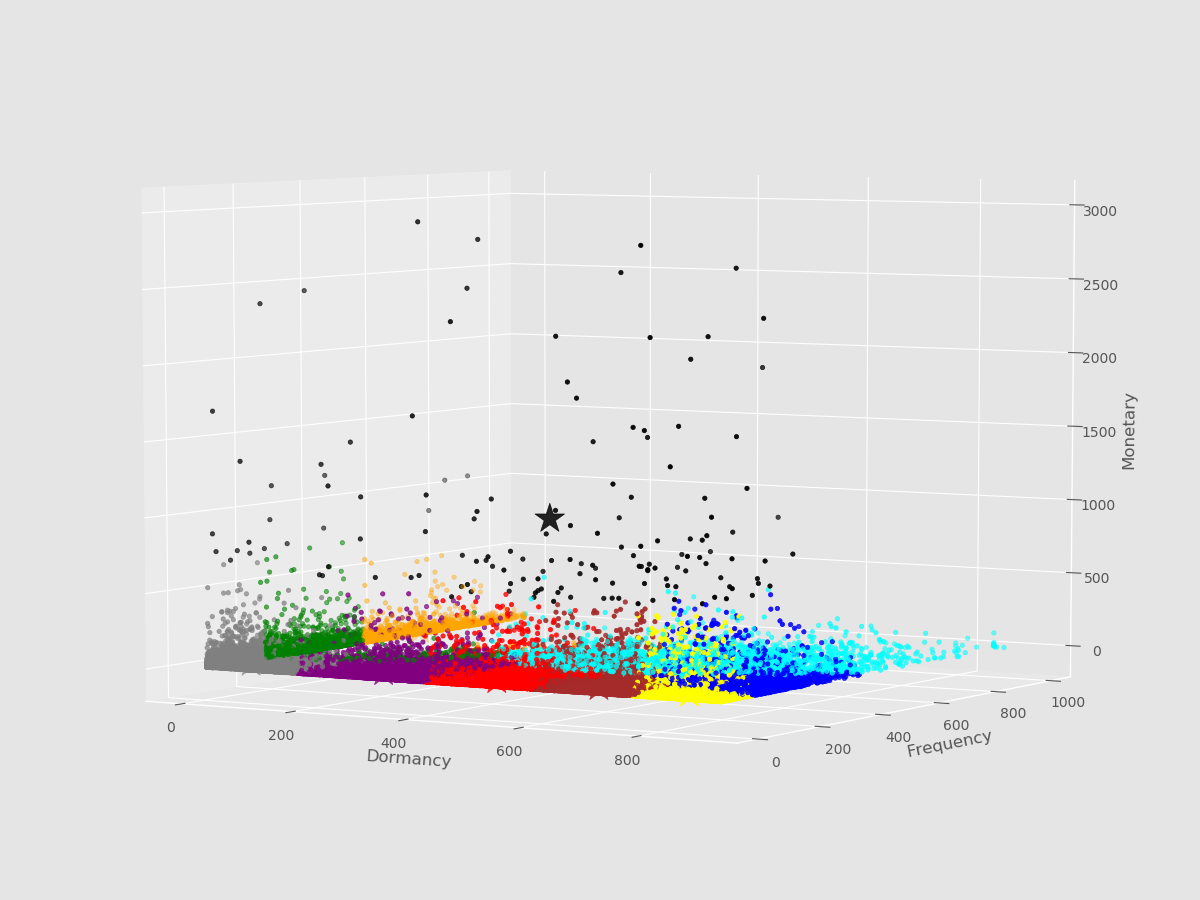

Text(0.5, 0, 'Monetary')

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], x[:,2], c=asignar, s=10)
ax.scatter(centroides[:,0], centroides[:,1], centroides[:,2], marker='*', c=color, s=500)
ax.set_xlabel('Dormancy')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')